# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [1]:
NAME = "IAD33"
COLLABORATORS = "Katarzyna Warzecha 407430 Zuzanna Stachura 405235"

---

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 3/4)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Wczytaj dane z przygotowanego wcześniej pliku eruption_data.csv do tablicy `eruptions_data` w taki sposób, aby kolumna Eruption Number stanowiła indeks tablicy.

Wyświetl przygotowaną tablicę.

In [4]:
# YOUR CODE HERE
#raise NotImplementedError()
eruptions_data = pd.read_csv('eruption_data.csv')
eruptions_data = eruptions_data.set_index('Eruption Number')
eruptions_data

,Volcano Name,Eruption Category,Evidence Type,Evidence Method,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,Observations,Reported,2.0,2022,10.0,21.0,2022.0,12.0,19.0
22481,Taal,Confirmed,Observations,Reported,1.0,2022,10.0,5.0,2022.0,10.0,29.0
22458,Turrialba,Confirmed,Observations,Reported,1.0,2022,7.0,17.0,2022.0,7.0,17.0
22453,Ulawun,Confirmed,Observations,Reported,2.0,2022,6.0,2.0,2022.0,6.0,2.0
22454,Raung,Confirmed,Observations,Satellite (infrared),2.0,2022,5.0,14.0,2022.0,9.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
14556,Tongariro,Confirmed,Correlation,Tephrochronology,5.0,-9650,NaN,NaN,NaN,NaN,NaN
21101,Craters of the Moon,Confirmed,Isotopic,14C (uncalibrated),0.0,-10060,NaN,NaN,NaN,NaN,NaN
22141,Igwisi Hills,Confirmed,Isotopic,Cosmic Ray Exposure,1.0,-10450,NaN,NaN,NaN,NaN,NaN


### Zadanie 4: Konstrukcja szeregów rodzielczych - bardziej skomplikowane tablice [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablicy `vei_data` zawierającej następujące elementy:

Indeks:
- VEI - wartości VEI posortowane od najmniejszej do największej.

Kolumny: </br>
- Nagłówki 1 poziomu:
    - Eruption category - All, Confirmed Eruption, Uncertain Eruption
- Nagłówki 2 poziomu (dla każdego z nagłówków 1 poziomu ten sam zestaw kolumn):
    - f - zliczenia poszczególnych kategorii (ang. frequency, absolute frequency),
    - cf - zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),
    - rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency),
    - crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency).

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [5]:
# YOUR CODE HERE
#raise NotImplementedError()

#all
vei_data_1 = pd.DataFrame({'VEI':eruptions_data['VEI'].unique()})
vei_data_1 = vei_data_1.reset_index(drop=True)
vei_data_1 = vei_data_1.sort_values('VEI')
vei_data_1 = vei_data_1.reset_index(drop=True)
vei_data_1 = vei_data_1.set_index('VEI')
vei_data_1['f'] = eruptions_data['VEI'].value_counts().to_frame()
vei_data_1['cf'] = vei_data_1['f'].cumsum()
vei_data_1['rf'] =vei_data_1['f']/sum(vei_data_1['f'])
vei_data_1['crf'] = vei_data_1['rf'].cumsum()
vei_data_1['rf'] = vei_data_1['rf'].round(decimals=4)
vei_data_1['crf'] = vei_data_1['crf'].round(decimals=4)

#confirmed
vei_data_2 = eruptions_data.loc[eruptions_data['Eruption Category'] == 'Confirmed','VEI'].value_counts().to_frame()
vei_data_2 = vei_data_2.sort_index()
vei_data_2 = vei_data_2.reset_index(drop=True)
vei_data_2.columns = ['f']
vei_data_2.index.name = 'VEI'
vei_data_2['cf'] = vei_data_2['f'].cumsum()
vei_data_2['rf'] =vei_data_2['f']/sum(vei_data_2['f'])
vei_data_2['crf'] = vei_data_2['rf'].cumsum()
vei_data_2['rf'] = vei_data_2['rf'].round(decimals=4)
vei_data_2['crf'] = vei_data_2['crf'].round(decimals=4)

#uncertain
vei_data_3 = eruptions_data.loc[eruptions_data['Eruption Category'] == 'Uncertain','VEI'].value_counts().to_frame()
vei_data_3 = vei_data_3.sort_index()
vei_data_3 = vei_data_3.reset_index(drop=True)
vei_data_3.columns = ['f']
vei_data_3.index.name = 'VEI'
vei_data_3['cf'] = vei_data_3['f'].cumsum()
vei_data_3['rf'] =vei_data_3['f']/sum(vei_data_3['f'])
vei_data_3['crf'] = vei_data_3['rf'].cumsum()
vei_data_3['rf'] = vei_data_3['rf'].round(decimals=4)
vei_data_3['crf'] = vei_data_3['crf'].round(decimals=4)

vei_data = pd.concat([vei_data_1, vei_data_2,vei_data_3], keys=['All eruptions', 'Confirmed Eruptions','Uncertain Eruptions'], axis=1)
vei_data.index = vei_data.index.astype(np.int64)
vei_data


All eruptions                       Confirmed Eruptions                \
                f    cf      rf     crf                   f    cf      rf   
VEI                                                                         
0            1007  1007  0.1215  0.1215                 803   803  0.1051   
1            1384  2391  0.1670  0.2886                1227  2030  0.1606   
2            3991  6382  0.4817  0.7703                3727  5757  0.4878   
3            1152  7534  0.1390  0.9094                1133  6890  0.1483   
4             511  8045  0.0617  0.9710                 510  7400  0.0668   
5             180  8225  0.0217  0.9928                 180  7580  0.0236   
6              53  8278  0.0064  0.9992                  53  7633  0.0069   
7               7  8285  0.0008  1.0000                   7  7640  0.0009   

            Uncertain Eruptions                         
        crf                   f     cf      rf     crf  
VEI                                                     
0    0.1051               204.0  204.0  0.3163  0.3163  
1    0.2657               157.0  361.0  0.2434  0.5597  
2    0.7535               264.0  625.0  0.4093  0.9690  
3    0.9018                19.0  644.0  0.0295  0.9984  
4    0.9686                 1.0  645.0  0.0016  1.0000  
5    0.9921                 NaN    NaN     NaN     NaN  
6    0.9991                 NaN    NaN     NaN     NaN  
7    1.0000                 NaN    NaN     NaN     NaN

In [6]:
## Komórka testowa
# Test 1: Indeks
assert (vei_data.index.name == 'VEI') == True
assert list(vei_data.index) == [0, 1, 2, 3, 4, 5, 6, 7]
# Test 2: Kolumny
assert len(set(list(vei_data.columns.levels[0])) & set(['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])) == 3
assert set(list(vei_data.columns.levels[1])) == set(['f', 'cf', 'rf', 'crf'])
# Test 3: Wartości w kolumnach f
assert list(vei_data['All eruptions']['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
assert list(vei_data['Confirmed Eruptions']['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
assert list(vei_data['Uncertain Eruptions']['f'].values[:5]) == [204, 157, 264, 19, 1] 
assert np.all(np.isnan(vei_data['Uncertain Eruptions']['f'].values[5:]))

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

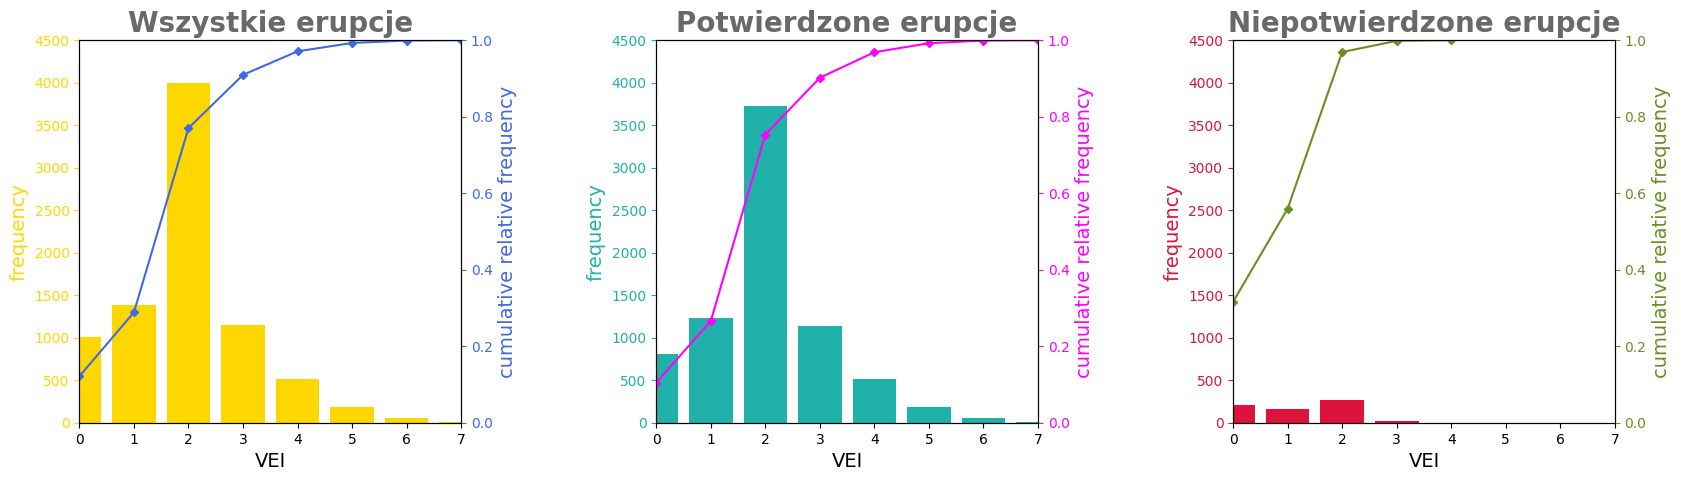

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
line_size = 4
fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].bar(vei_data.index, vei_data['All eruptions']['f'], color='gold')
ax[0].axis([0, 7, 0, 4500])
ax[0].tick_params(axis='y', colors='gold')
ax[0].set_ylabel("frequency", fontsize=14,color='gold')
ax[0].set_xlabel("VEI", fontsize=14)
ax[0] = ax[0].twinx()
ax[0].plot(vei_data.index, vei_data['All eruptions']['crf'], color='royalblue', marker="D", ms=line_size)
ax[0].tick_params(axis='y', colors='royalblue')
ax[0].set_ylabel("cumulative relative frequency", fontsize=14,color='royalblue')
ax[0].axis([0, 7, 0, 1])
ax[0].set_title('Wszystkie erupcje',weight='bold',fontsize=20,color = 'dimgray')

ax[1].bar(vei_data.index, vei_data['Confirmed Eruptions']['f'], color='lightseagreen')
ax[1].axis([0, 7, 0, 4500])
ax[1].tick_params(axis='y', colors='lightseagreen')
ax[1].set_ylabel("frequency", fontsize=14,color='lightseagreen')
ax[1].set_xlabel("VEI", fontsize=14)
ax[1] = ax[1].twinx()
ax[1].plot(vei_data.index, vei_data['Confirmed Eruptions']['crf'], color='magenta', marker="D", ms=line_size)
ax[1].tick_params(axis='y', colors='magenta')
ax[1].set_ylabel("cumulative relative frequency", fontsize=14,color='magenta')
ax[1].axis([0, 7, 0, 1])
ax[1].set_title('Potwierdzone erupcje',weight='bold',fontsize=20,color = 'dimgray')

ax[2].bar(vei_data.index, vei_data['Uncertain Eruptions']['f'], color='crimson')
ax[2].axis([0, 7, 0, 4500])
ax[2].tick_params(axis='y', colors='crimson')
ax[2].set_ylabel("frequency", fontsize=14,color='crimson')
ax[2].set_xlabel("VEI", fontsize=14)
ax[2] = ax[2].twinx()
ax[2].plot(vei_data.index, vei_data['Uncertain Eruptions']['crf'], color='olivedrab', marker="D", ms=line_size)
ax[2].tick_params(axis='y', colors='olivedrab')
ax[2].set_ylabel("cumulative relative frequency", fontsize=14,color='olivedrab')
ax[2].axis([0, 7, 0, 1])
ax[2].set_title('Niepotwierdzone erupcje',weight='bold',fontsize=20,color = 'dimgray')

fig.tight_layout(pad=5.0)
plt.show()

### Zadanie 5: Rodzaje metod wykrywania erupcji [10 pkt]

Przygotuj tablice `evidence_data` zawiarającą informacje o tym ile erupcji o poszczególnych wartościach VEI zostało potwierdzonych przy użyciu poszczególnych metod weryfikacji.
Tablica powinna zawierać następujące elementy:

Indeks:
- Nagłówki 1 poziomu
    - kategoria dowodów
- Nagłówki 2 poziomu:
    - metoda, która dostarczyła dowodów

Kolumny: </br>
- VEI - wartości VEI posortowane od najmniejszej do największej oraz kolumna "All", w której znajdują się dane dotyczące wszystkich erupcji, bez podziału na VEI.

Wyświetl przygotowane tablicę w taki sposób, aby zawarte w tablicy liczby (w tym wartości VEI w nagłówkach kolumn) wyświetlały się bez miejsc po przecinku.

In [8]:
# YOUR CODE HERE
#raise NotImplementedError()
evidence_data = eruptions_data.groupby(['Evidence Type', 'Evidence Method', 'VEI']).size().unstack(fill_value=0)
evidence_data['All'] = eruptions_data.groupby(['Evidence Type', 'Evidence Method']).size()
evidence_data



VEI                                 0.0   1.0   2.0  3.0  4.0  5.0  6.0  7.0  \
Evidence Type Evidence Method                                                  
Correlation   Anthropology            4     1     5    2    6    1    0    0   
              Magnetism              34     0     5    0    2    0    0    0   
              Tephrochronology       71    16   122  124  103   22    5    0   
Isotopic      14C (calibrated)       41    12    49  100  105   70   21    3   
              14C (uncalibrated)    125     7    34   54   91   41   19    1   
              Ar/Ar                  12     1     0    0    1    1    0    0   
              Cosmic Ray Exposure    20     1     0    0    1    0    0    0   
              K/Ar                   10     0     0    1    0    0    0    0   
              Uranium-series         24     0     0    0    0    0    0    0   
Observations  Aviation                0     1     0    0    0    0    0    0   
              Hydrophonic            68     3     0    0    0    0    0    0   
              Photo / Video           1     1     1    0    0    0    0    0   
              Reported              376  1200  3430  837  194   42    7    1   
              Satellite (infrared)    1     0     1    1    0    0    0    0   
              Satellite (visual)      0     2     3    1    0    0    0    0   
              Seismicity             15     0     1    0    0    0    0    0   
Radiogenic    Fission track           0     0     0    1    0    0    0    0   
              Thermoluminescence      1     0     0    0    1    0    0    0   
Sidereal      Dendrochronology        0     0     0    1    2    3    0    0   
              Ice Core                0     0     3    0    3    0    1    2   
              Varve Count             0     1    66    8    1    0    0    0   
Uncertain     Unspecified           204   138   271   22    1    0    0    0   

VEI                                  All  
Evidence Type Evidence Method             
Correlation   Anthropology            19  
              Magnetism               41  
              Tephrochronology       463  
Isotopic      14C (calibrated)       401  
              14C (uncalibrated)     372  
              Ar/Ar                   15  
              Cosmic Ray Exposure     22  
              K/Ar                    11  
              Uranium-series          24  
Observations  Aviation                 1  
              Hydrophonic             71  
              Photo / Video            3  
              Reported              6087  
              Satellite (infrared)     3  
              Satellite (visual)       6  
              Seismicity              16  
Radiogenic    Fission track            1  
              Thermoluminescence       2  
Sidereal      Dendrochronology         6  
              Ice Core                 9  
              Varve Count             76  
Uncertain     Unspecified            636

In [9]:
# Test 1 Kształt tablicy
assert evidence_data.shape == (22, 9)
# # Test 2 Kolumny
assert len(set(list(evidence_data.columns)) & set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 'All'])) == 9
# Test 3 Indeks
assert (eruptions_data.index.name == 'Eruption Number') == True
assert len(set(list(evidence_data.index)) & set([('Observations', 'Reported'), ('Observations', 'Satellite (infrared)'), ('Observations', 'Satellite (visual)'),
                                ('Observations', 'Seismicity'), ('Observations', 'Hydrophonic'), ('Observations', 'Photo / Video'), ('Observations', 'Aviation'),
                                ('Uncertain', 'Unspecified'), ('Isotopic', 'Uranium-series'), ('Isotopic', '14C (calibrated)'), ('Isotopic', '14C (uncalibrated)'),
                                ('Isotopic', 'Cosmic Ray Exposure'), ('Isotopic', 'Ar/Ar'), ('Isotopic', 'K/Ar'), ('Correlation', 'Magnetism'), ('Correlation', 'Tephrochronology'),
                                ('Correlation', 'Anthropology'), ('Sidereal', 'Varve Count'), ('Sidereal', 'Dendrochronology'), ('Sidereal', 'Ice Core'), ('Radiogenic', 'Fission track'),
                                ('Radiogenic', 'Thermoluminescence')])) == 22
# Test 4 Kilka losowo wybranych wartości w tablicy
assert evidence_data.loc[('Observations', 'Reported'), 0] == 376
assert evidence_data.loc[('Uncertain', 'Unspecified'), 3] == 22
assert evidence_data.loc[('Sidereal', 'Ice Core'), 7] == 2
assert evidence_data.loc[('Isotopic', '14C (uncalibrated)'), 5] == 41
assert evidence_data.loc[('Correlation', 'Anthropology'), 6] == 0

### Zadanie 6: Wizualizacja rozkładu zarejestrowanych erupcji w czasie [2 pkt]

Korzystając z funkcji `seaborn.stripplot()` zwizualizuj jak rozkładały się w czasie wystąpienia zarejestrowanych erupcji. Do rozróżnienia erupcji w czasie wykorzystaj rok, w którym nastąpił ich początek.

Wyniki zestaw na pojedynczej figurze (siatka wykresów 2x1). Na górnym wykresie przedstaw dane rozróżnione tylko po kątem VEI, a na dolnym wykresie przedstaw dane rozróżnione zarówno po VEI jak i rodzaju dowodu ich wystąpienia (Evidence Type). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- dodaj legendę do dolnego wykresu w taki sposób, aby nie zasłaniała znajdujących nię na nim danych,
- ustaw format wyświetlania wartości VEI bez miejsc po przecinku.

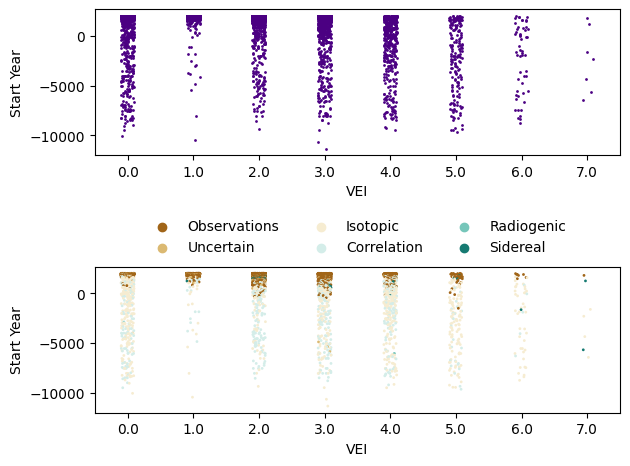

In [10]:
# YOUR CODE HERE
#raise NotImplementedError()

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
sns.stripplot(x="VEI", y="Start Year", data=eruptions_data, ax=ax1,color='indigo',s=2)
w2 = sns.stripplot(x="VEI", y="Start Year", hue = "Evidence Type",data=eruptions_data, ax=ax2, palette="BrBG",s=2)
sns.move_legend(w2, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,)
fig.tight_layout()
plt.show()

fig.savefig('image.png')